# we will be analyzing sonar frequencies to help distinguish between rocks or sea mines

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('sonar.all-data.csv')

In [6]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [8]:
df.describe()


,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Label'], dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in non_numeric_cols:
    encoder = LabelEncoder()
    df_encoded[col] = encoder.fit_transform(df[col])

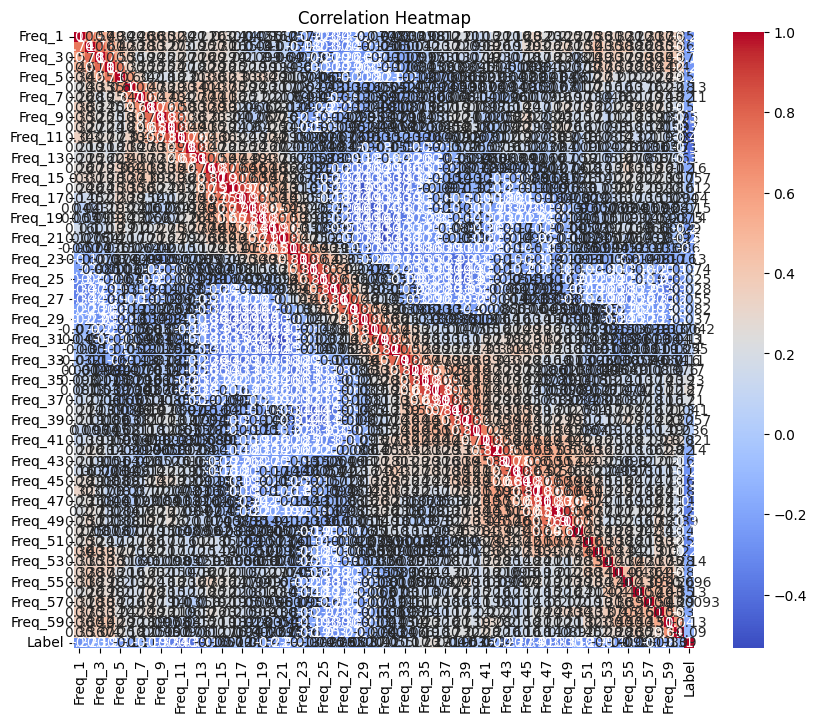

In [11]:
correlation_matrix = df_encoded.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [12]:
df['Target']=df['Label'].map({'R':0,'M':1})

In [13]:
df['Target'] = df['Label'].map({'R': 0, 'M': 1})
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
np.abs(correlation_matrix['Target']).sort_values(ascending=False).head(6)

,Target
Target,1.000000
Freq_11,0.432855
Freq_12,0.392245
Freq_49,0.351312
Freq_10,0.341142
Freq_45,0.339406


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
X=df.drop(['Target','Label'],axis=1)
y=df['Label']

In [16]:
y

,Label
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [18]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.66900062, -0.64327335, -0.66511752, ..., -0.84906331,
        -0.83152247, -0.48172461],
       [ 0.06269548,  0.40735203,  0.58475689, ...,  0.60689806,
         0.72422649, -0.21021653],
       [ 0.18112029, -0.75701627,  0.69790341, ...,  4.44943527,
         0.75630378,  1.74852034],
       ...,
       [-0.13608901, -0.58340866, -0.46513761, ..., -1.08922188,
        -0.55886544,  0.21643902],
       [ 0.43065827,  0.09904886,  0.04007478, ..., -0.18862722,
        -0.4145176 ,  0.41037337],
       [ 1.24694352,  2.46370428,  2.20301533, ...,  0.30669984,
         2.39224599,  1.12793044]])

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)


In [21]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [22]:
knn.predict(X_test_scaled)

array(['M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M'], dtype=object)

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],  # Only used for Minkowski metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [25]:
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Metric for evaluation
    verbose=1,            # Print progress
    n_jobs=-1             # Use all available cores
)

In [26]:
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [1]:
k_values = list(range(1,30))

In [27]:
grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [28]:
grid_search.best_score_

0.7910384068278805

In [29]:
grid_search.cv_results_['mean_test_score']

array([0.77524893, 0.77524893, 0.77524893, 0.77524893, 0.76472262,
       0.77539118, 0.76472262, 0.77539118, 0.7487909 , 0.75405405,
       0.7487909 , 0.75405405, 0.71123755, 0.74864865, 0.71123755,
       0.74864865, 0.70583215, 0.72190612, 0.70583215, 0.72190612,
              nan, 0.79103841,        nan, 0.79103841,        nan,
       0.75903272,        nan, 0.75903272,        nan, 0.78093883,
              nan, 0.78093883,        nan, 0.76472262,        nan,
       0.76472262,        nan, 0.7541963 ,        nan, 0.7541963 ,
              nan, 0.79103841, 0.77524893, 0.77524893,        nan,
       0.75903272, 0.76472262, 0.77539118,        nan, 0.78093883,
       0.7487909 , 0.75405405,        nan, 0.76472262, 0.71123755,
       0.74864865,        nan, 0.7541963 , 0.70583215, 0.72190612,
       0.77524893, 0.77524893, 0.77524893, 0.77524893, 0.76472262,
       0.77539118, 0.76472262, 0.77539118, 0.7487909 , 0.75405405,
       0.7487909 , 0.75405405, 0.71123755, 0.74864865, 0.71123

In [30]:
print(grid_search.cv_results_.keys())


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_algorithm', 'param_metric', 'param_n_neighbors', 'param_p', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [32]:
pred =grid_search.predict(X_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
confusion_matrix(y_test,pred)

array([[12,  1],
       [ 0,  8]])

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       1.00      0.92      0.96        13
           R       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

